# Pairwise t-tests
Manually running separate comparisons using individual t-tests can be a pain as the number of groups gets larger. Thankfully, the pingouin package's .pairwise_tests() method can make things easier.

You will explore the differences in average time-on-page metric between four different landing page variants loaded in the homepage DataFrame.

The dataset "checkout_data" has the columns signup and time_on_page. Every row in the DataFrame corresponds to a unique user visiting the respective landing_page. The signup column consists of binary data: '1' means the user signed up and '0' means abandoned the page, and the time_on_page column represents the time (in seconds) each user spent on the landing page before abandoning or signing up .

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
checkout_data = pd.read_csv('../data/checkout.csv')
checkout_data.head(3)

#### We analyzed the average time on page for each group

In [7]:
checkout_data.groupby('checkout_page')['time_on_page'].mean()

checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64

#### We checked whether the time on page by group follows a normal distribution

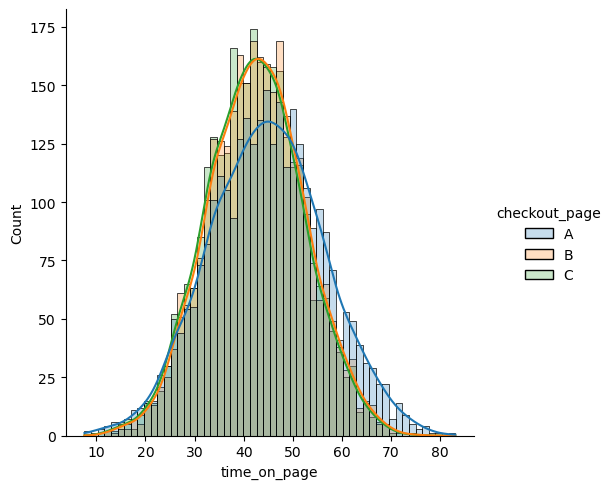

In [6]:
sns.displot(data=checkout_data, x='time_on_page', hue='checkout_page', alpha=0.25, kde=True)
plt.show()

In [11]:
import pingouin

bonferroni_pairwise = pingouin.pairwise_tests(data=checkout_data,
                                   dv="time_on_page",
                                   between="checkout_page",
                                   padjust="bonf")

print(bonferroni_pairwise)

        Contrast  A  B  Paired  Parametric         T     dof alternative  \
0  checkout_page  A  B   False        True  7.026673  5998.0   two-sided   
1  checkout_page  A  C   False        True  8.833244  5998.0   two-sided   
2  checkout_page  B  C   False        True  1.995423  5998.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  2.349604e-12  7.048812e-12     bonf  1.305e+09  0.181405  
1  1.316118e-18  3.948354e-18     bonf  1.811e+15  0.228045  
2  4.604195e-02  1.381258e-01     bonf      0.212  0.051515  


#### Executive Summary

After adjusting for multiple comparisons using the Bonferroni correction, statistically significant differences were found between checkout page A and checkout pages B and C. However, the observed effect sizes are small, indicating that while the differences are statistically detectable, their practical impact is limited. No statistically significant differences were observed between checkout pages B and C after correction.


#### Business Insight

Checkout page A behaves differently from pages B and C, whereas pages B and C perform similarly. If page A is considered the control, switching to either page B or C leads to statistically significant changes, but the magnitude of these changes is small. Therefore, any decision to replace page A should weigh the implementation cost against the relatively modest expected business impact.
